# Importing Python Packages

In [2]:
import openpyxl
import xlrd
import os
import glob

# import nltk (natural language tool kit)
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [66]:
# import python packages

import requests
from lxml import html
import csv
import pandas as pd
import patsy
from os import path

import matplotlib.pyplot as plt
%matplotlib inline


#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))

# Importing Data

## Opening the Correct Directory

In [4]:
os.chdir('C:\\Users\\millsj.ADMIN\\Desktop\\GENBA 894\\2018_DataChallenges_Teradata\\Donations\\')

In [92]:
# filenames
excel_names = ["2013 Bike Donations.xlsx", "2014 Bike Donations.xlsx", "2015 Bike Donations.xlsx","2016 Bike Donations.xlsx","2017 Bike Donations.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
combined = pd.concat(frames)

# Check headers
combined.head(3)

,Security Category Name,Event ID,Public Event Name,Fiscal Year,Event Date,Campaign Title,Campaign ID,Gift Amount($),Date Recorded,Gift Type,...,Team Creation Date,Original Value Transacted,Net Transaction Amount,Ledger Transaction Amount,Proxy Type,User Confirmation Code,Source Code Type,Source Code Text,Sub Source Code Text,Batch ID
0,ARR Bike Events,21467,Bike MS: Rock'n Hot Ride 2013,2013,2013-09-07 13:34:00,"Arkansas, Little Rock - bike MS: Arkansas 2013",37233,50.0,2013-09-19 08:02:00,online,...,2013-02-13 09:58:00,50,50,50,TeamRaiser Participant,1638-37233-1-12589190-13049839,6,mail.yahoo.com,NaN,NaN
1,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,35.0,2013-09-09 18:55:00,online,...,2012-11-05 19:55:00,35,35,35,TeamRaiser Participant,1638-36094-1-12523987-12980208,NaN,NaN,NaN,NaN
2,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,50.0,2013-09-12 18:43:00,online,...,2012-11-05 16:57:00,50,50,50,TeamRaiser Participant,1638-36094-1-12547614-13005364,NaN,NaN,NaN,NaN


In [ ]:
# convert string to integers
#combined['Donor Accept Email'] = (combined['Donor Accept Email'] == 'TRUE').astype(int)

# Looking for Data Anomalies

In [ ]:
# List of all headers
# combined[['Security Category Name','Event ID','Public Event Name','Fiscal Year','Event Date','Campaign Title','Campaign ID','Gift Amount($)','Date Recorded','Gift Type','Gift Payment Method','Offline Status','Soft Credit Type','Is Registration?','Donor ConsID','Donor Member ID','Donor Affiliate Code','Donor Gender','Donor Accept Email','Donor Opt-out Date','Donor Opt-out Method','Donor Email Status','Donor City','Donor State','Donor County','Donor ZIP','Donor Employer','Donor Connection to MS','Participant Contact ID','Participant Member ID','Participation Type Name','Registration Active Status','Registration Date','Participant Goal($)','Is Prior Participant','Is Team Captain','Additional Gift Amount($)','Team Name','Team','Team Creation Date','Original Value Transacted','Net Transaction Amount','Ledger Transaction Amount','Proxy Type','User Confirmation Code','Source Code Type','Source Code Text','Sub Source Code Text','Batch ID']]

In [93]:
# counting zero values
print((combined[['Security Category Name','Event ID','Public Event Name','Fiscal Year','Event Date','Campaign Title','Campaign ID','Gift Amount($)','Date Recorded','Gift Type','Gift Payment Method','Offline Status','Soft Credit Type','Is Registration?','Donor ConsID','Donor Member ID','Donor Affiliate Code','Donor Gender','Donor Accept Email','Donor Opt-out Date','Donor Opt-out Method','Donor Email Status','Donor City','Donor State','Donor County','Donor ZIP','Donor Employer','Donor Connection to MS','Participant Contact ID','Participant Member ID','Participation Type Name','Registration Active Status','Registration Date','Participant Goal($)','Is Prior Participant','Is Team Captain','Additional Gift Amount($)','Team Name','Team','Team Creation Date','Original Value Transacted','Net Transaction Amount','Ledger Transaction Amount','Proxy Type','User Confirmation Code','Source Code Type','Source Code Text','Sub Source Code Text','Batch ID']] == 0).sum())


Security Category Name              0
Event ID                            0
Public Event Name                   0
Fiscal Year                         0
Event Date                          0
Campaign Title                      0
Campaign ID                         0
Gift Amount($)                 281753
Date Recorded                       0
Gift Type                           0
Gift Payment Method                 0
Offline Status                      0
Soft Credit Type                    0
Is Registration?              3429578
Donor ConsID                        0
Donor Member ID                     0
Donor Affiliate Code                0
Donor Gender                        0
Donor Accept Email            1911858
Donor Opt-out Date                  0
Donor Opt-out Method                0
Donor Email Status                  0
Donor City                          3
Donor State                         0
Donor County                        0
Donor ZIP                         801
Donor Employ

In [94]:
# Counting missing values
combinednull=(combined[['Security Category Name','Event ID','Public Event Name','Fiscal Year','Event Date','Campaign Title','Campaign ID','Gift Amount($)','Date Recorded','Gift Type','Gift Payment Method','Offline Status','Soft Credit Type','Is Registration?','Donor ConsID','Donor Member ID','Donor Affiliate Code','Donor Gender','Donor Accept Email','Donor Opt-out Date','Donor Opt-out Method','Donor Email Status','Donor City','Donor State','Donor County','Donor ZIP','Donor Employer','Donor Connection to MS','Participant Contact ID','Participant Member ID','Participation Type Name','Registration Active Status','Registration Date','Participant Goal($)','Is Prior Participant','Is Team Captain','Additional Gift Amount($)','Team Name','Team','Team Creation Date','Original Value Transacted','Net Transaction Amount','Ledger Transaction Amount','Proxy Type','User Confirmation Code','Source Code Type','Source Code Text','Sub Source Code Text','Batch ID']])

print(combinednull.isnull().sum())

Security Category Name              0
Event ID                            0
Public Event Name                   0
Fiscal Year                         0
Event Date                         42
Campaign Title                      0
Campaign ID                         0
Gift Amount($)                      0
Date Recorded                       0
Gift Type                           0
Gift Payment Method                 0
Offline Status                3026555
Soft Credit Type                    0
Is Registration?                    0
Donor ConsID                        0
Donor Member ID                  4928
Donor Affiliate Code            15079
Donor Gender                   483830
Donor Accept Email                969
Donor Opt-out Date            1955161
Donor Opt-out Method          1946013
Donor Email Status             208623
Donor City                        787
Donor State                     25953
Donor County                    74054
Donor ZIP                         983
Donor Employ

In [95]:
#compute count of values in columns
combined['Donor Gender'].value_counts()

# initial results yielded the following results:
#F              17
#True            7
#False           6
#Femala          4
#U               3
#Feiale          2
#M               2
#Famale          1
#Iale            1

# All were corrected to Male and Female except for "U", which is used by facebook to denote a custom gender

Male      1672368
Female    1651171
U               3
Name: Donor Gender, dtype: int64

In [96]:
#compute count of values in columns
combined['Donor Connection to MS'].value_counts()

#Initial results identified numerous errors that all appeared to be a result of import errors into the original data set. nearly all were off a column because of a "(" being entered rather than a comma
#examples include the following:
#14818518                                        1
#12057647                                        1
#12694296                                        1
#15293891                                        1
#9588529                                         1
#2157460                                         1
#Relative has MS(12975626                        1
#12602902                                        1
#(14068228                                       1
#10169576                                        1
#Other(15767842                                  1
#12745283                                        1
#(4564506                                        1
#Bhank                                           1

# Also deleted "Blank", changed "no connection" to "None", and standardized the relatives



Friend has MS                           834351
None                                    346950
Relative has MS                         310524
Other                                   131006
I have MS                                94669
Sibling has MS                           60055
Parent has MS                            52146
Spouse has MS                            35669
Child has MS                             30501
I have a Friend or Co-worker with MS      9876
Caregiver of Person with MS               2049
Possible MS                                876
Care Manager of Person with MS             741
Name: Donor Connection to MS, dtype: int64

In [97]:
#compute count of values in columns
combined['Public Event Name'].value_counts()

2015 BP MS 150                                                   167964
Texas, Houston - 2014 BP MS 150                                  164425
2013 BP MS 150                                                   155332
2016 BP MS 150                                                   128459
2017 BP MS 150                                                   113976
New Jersey, Cherry Hill  Bike MS: City to Shore 2013              78151
New Jersey, Cherry Hill  Bike MS: City to Shore 2014              77751
Bike MS: City to Shore Ride 2015                                  67060
Bike MS: City to Shore Ride 2016                                  59173
Bike MS: City to Shore Ride 2017                                  55658
Minnesota - Bike MS: C.H. Robinson MS 150 Ride 2013               40607
Bike MS: C.H. Robinson MS 150 Ride 2015                           38233
Bike MS: C.H. Robinson MS 150 Ride 2016                           37818
Bike MS: C.H. Robinson MS 150 Ride 2014                         

In [98]:
#compute count of values in columns
combined['Donor Email Status'].value_counts()

# cleaned all typos, original results included the following:
#Good                 2991980
#Unknown               274603
#Bad (Hard Bounce)     242757
#Bad (Soft Bounce)      89404
#Bad (Sofp Bounce)          1
#Cood                       1
#Bad (Soft Bkunce)          1
#Gkod                       1
#Goo`                       1

Good                 2991982
Unknown               274604
Bad (Hard Bounce)     242757
Bad (Soft Bounce)      89406
Name: Donor Email Status, dtype: int64

In [99]:
#compute count of values in columns
combined['Donor City'].value_counts()

# found street addresses in original data, corrected to the appropriate city column


Houston                 253784
New York                 46363
Minneapolis              38137
Austin                   36678
Princeton                36174
Denver                   35857
Katy                     34959
Philadelphia             33675
Saint Louis              28408
Spring                   27624
Chicago                  26749
Dallas                   26418
Seattle                  24972
San Antonio              24726
San Francisco            23310
Pittsburgh               22933
Sugar Land               19469
Raleigh                  18726
Saint Paul               18241
Cypress                  17560
Brooklyn                 16472
Richmond                 16294
Jacksonville             15728
San Diego                15266
Charlotte                15202
Kansas City              13754
Portland                 13661
Washington               13609
Los Angeles              13140
Cincinnati               12981
                         ...  
SSF                          1
long lak

In [100]:
#compute count of values in columns
combined['Donor ZIP'].value_counts()

8543        33831
77494       17960
77007       13691
77479       12548
77024       12019
77450       11355
77008       11145
77079       10196
77054       10003
44236        9537
77077        9259
77005        9153
77429        9094
75006        8691
77379        8689
77056        8000
77433        7887
77019        7413
77459        7332
77095        7259
44131        6892
1810         6747
19103        6703
77381        6674
77382        6644
77584        6567
77057        6292
80209        6211
77401        6169
77006        6064
            ...  
NP265NU         1
L6J1X5          1
T2P2H6          1
NW51SH          1
L6M2G8          1
SG137DN         1
NW35TP          1
V1W 5K2         1
SE12JJ          1
RH89HE          1
AL73NT          1
PO93JD          1
EC4V6JA         1
DD100BU         1
48853           1
RG95BN          1
RM25AU          1
WD234GD         1
KY89LS          1
V5L 1E8         1
LA17 7XJ        1
H3X3K5          1
SY197DB         1
AB417AH         1
48884     

In [101]:
#compute count of values in columns
combined['Donor Employer'].value_counts()

# Original results had multiple versions of Retired, Self employed, and company names (e.g. Alabama Power Company and Alabama Power Co); corrected the obvious, changed all cases to upper and left them as is if unknown

SELF EMPLOYED                            18688
RETIRED                                  14346
TXH ANONYMOUS DONOR CIC                   7679
OHA ANONYMOUS DONOR CIC                   5885
PAX ANONYMOUS DONOR CIC                   4788
BP FOUNDATION MATCHING GIFTS              4757
MNM ANONYMOUS DONOR CIC                   4736
BANK OF AMERICA CHARITABLE FOUNDATION     4144
PAE ANONYMOUS DONOR CIC                   4104
GE FOUNDATION MATCHING GIFTS              3718
CHEVRON (YOURCAUSE)                       3359
BP                                        3281
SHELL OIL COMPANY MATCHING GIFTS          3215
KSG ANONYMOUS DONOR CIC                   2764
CONOCOPHILLIPS MATCHING GIFT PROGRAM      2441
JOHNSON & JOHNSON MATCHING GIFTS          2359
NONE                                      2336
MAM ANONYMOUS DONOR CIC                   2222
MICROSOFT VOLUNTEER MANAGER               2213
PRIMAL WEAR INC                           2178
FLN ANONYMOUS DONOR CIC                   2037
NCT ANONYMOUS

In [102]:
#compute count of values in columns
combined['Gift Payment Method'].value_counts()

# original results showed a "Credit Car`" result, which was corrected to Credit Card

Credit Card    3068986
Check           658483
Cash             79903
Name: Gift Payment Method, dtype: int64

# Data Analysis

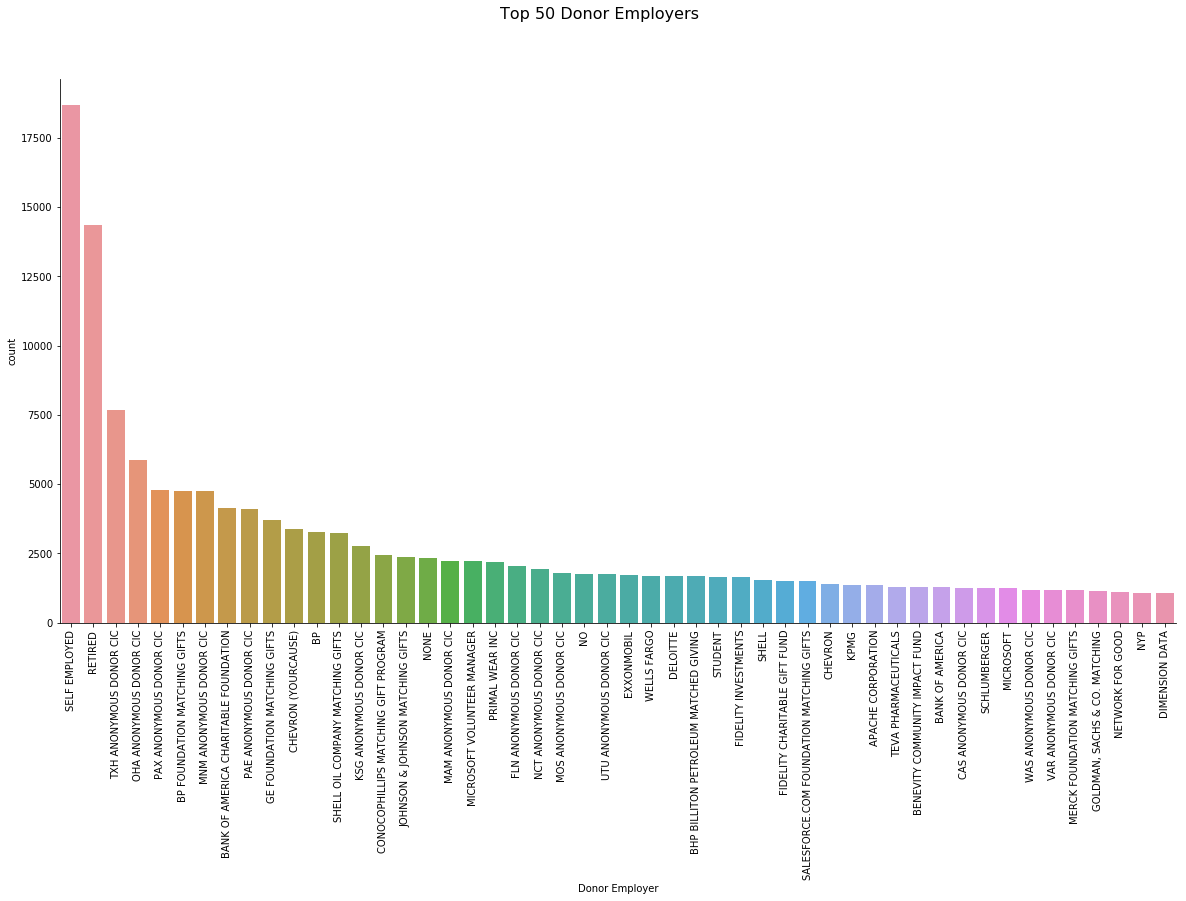

In [103]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Donor Employer', data=combined,order = combined['Donor Employer'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.suptitle('Top 50 Donor Employers', fontsize=16)

sns.despine()
#plt.tight_layout()

Text(0.5,0.98,'Gift Amount by Top 50 Employers and Payment Method')

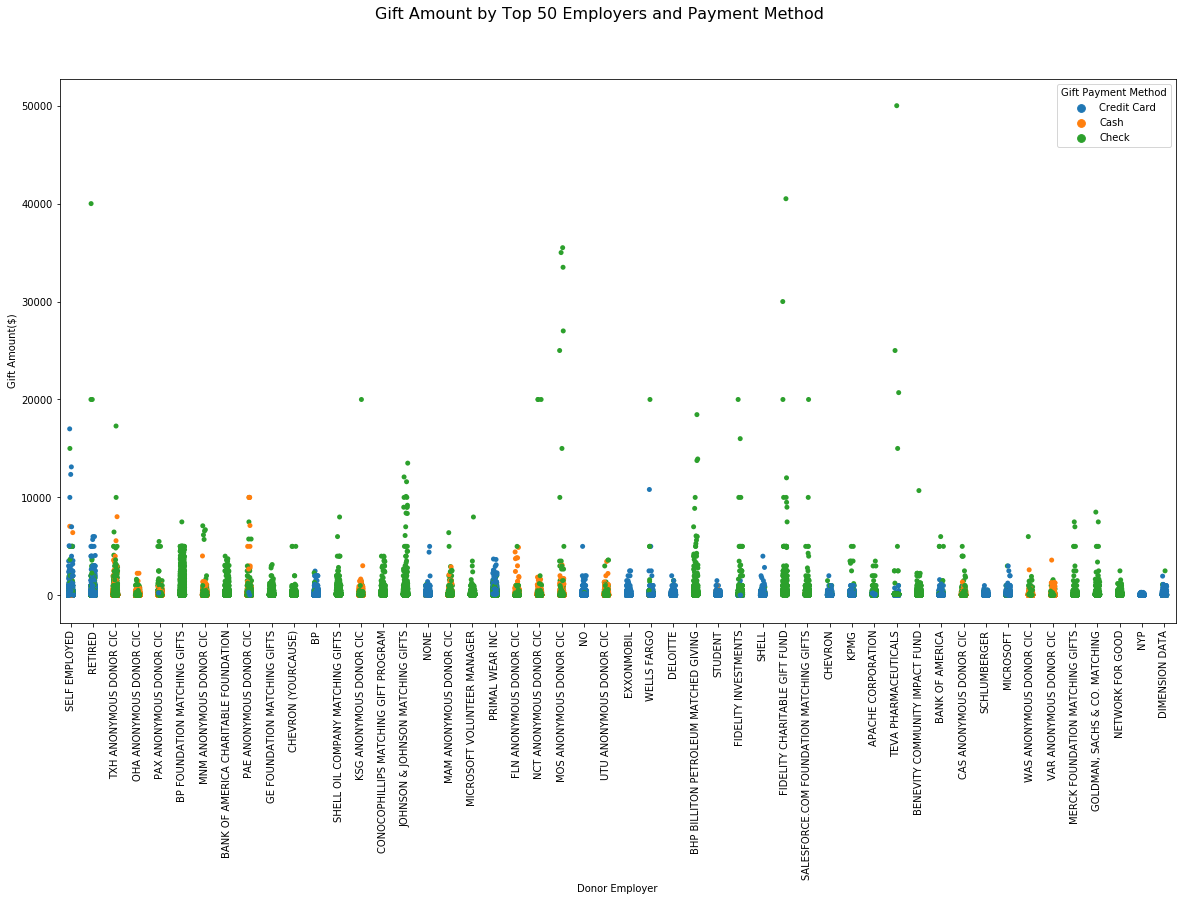

In [104]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Donor Employer', y="Gift Amount($)", hue="Gift Payment Method",data=combined, order = combined['Donor Employer'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Gift Amount by Top 50 Employers and Payment Method', fontsize=16)



Text(0.5,0.98,'Gift Amount by Top 50 Employers and Donor Connection to MS')

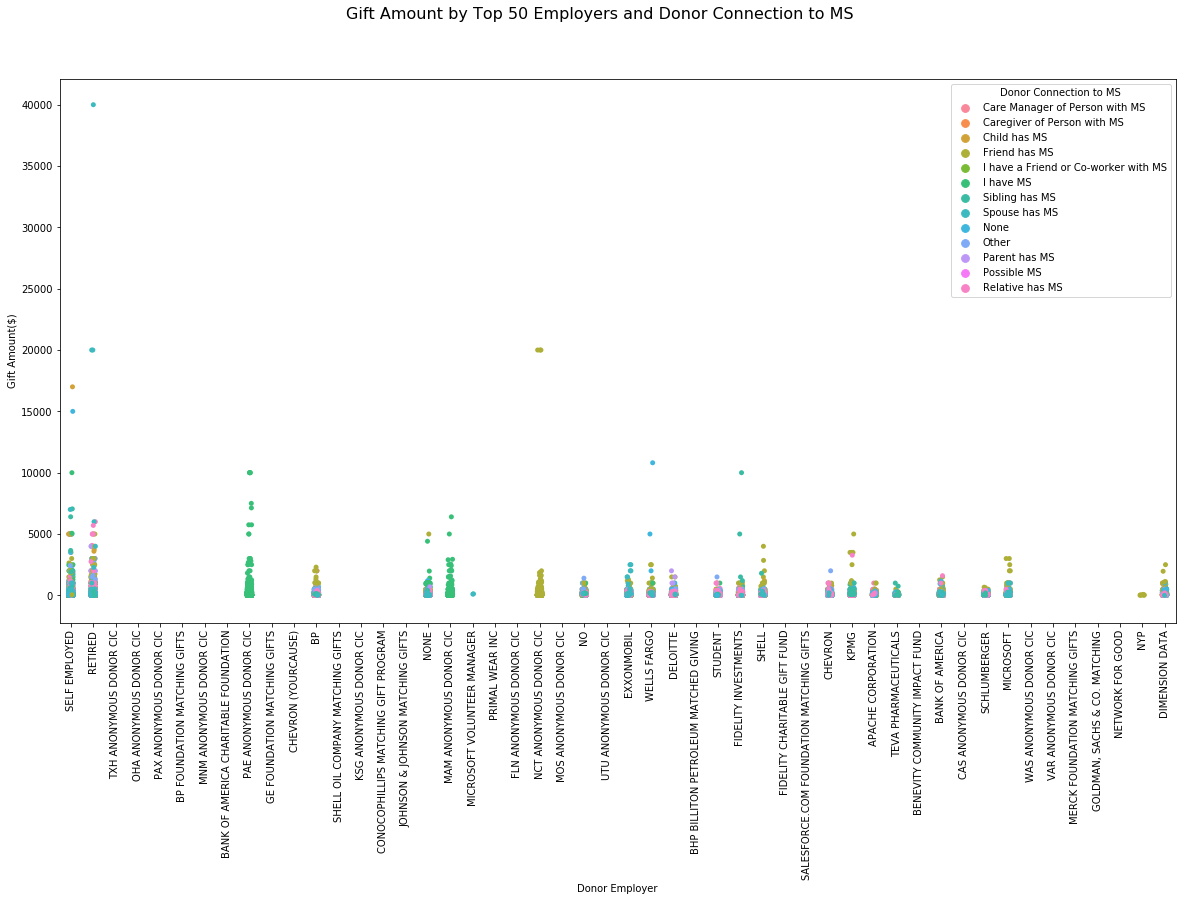

In [105]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Donor Employer', y="Gift Amount($)", hue="Donor Connection to MS",data=combined, order = combined['Donor Employer'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Gift Amount by Top 50 Employers and Donor Connection to MS', fontsize=16)



Text(0.5,0.98,'Gift Amount by Donor Connection to MS and Payment Method')

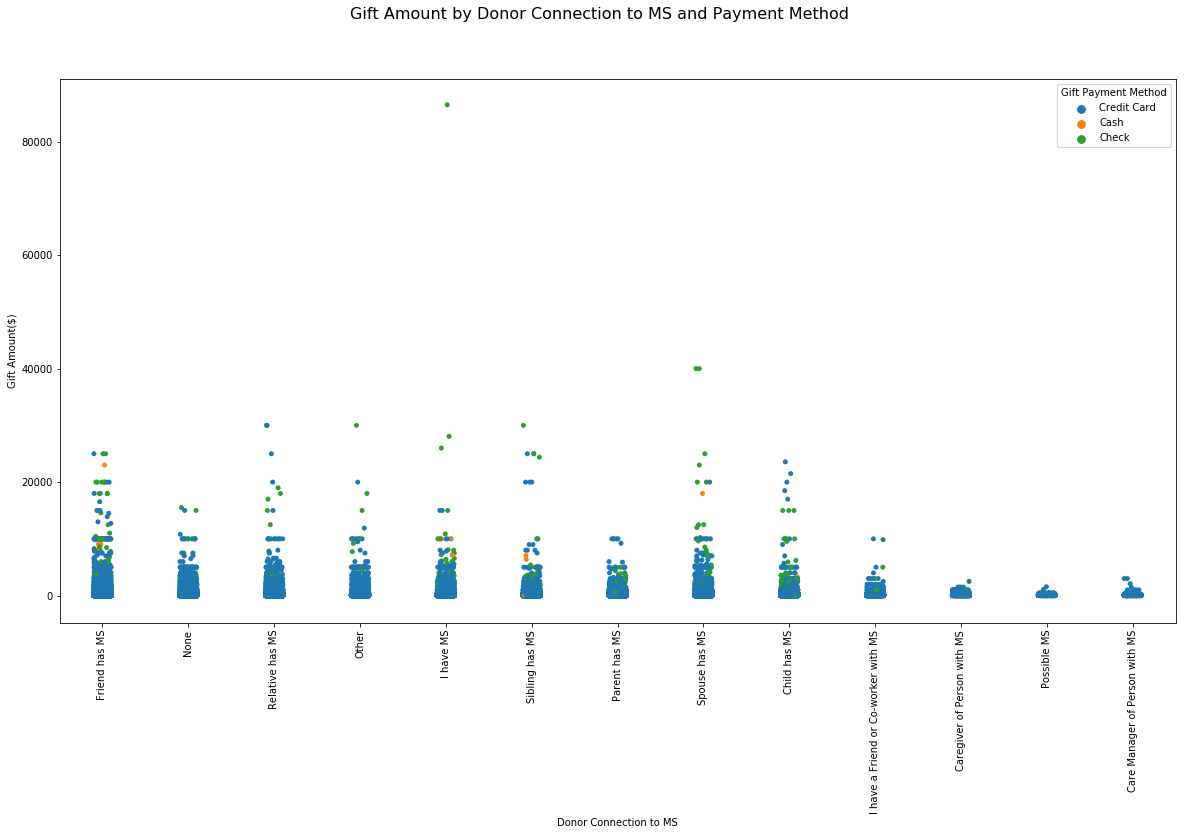

In [106]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Donor Connection to MS', y="Gift Amount($)", hue="Gift Payment Method",data=combined, order = combined['Donor Connection to MS'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Gift Amount by Donor Connection to MS and Payment Method', fontsize=16)



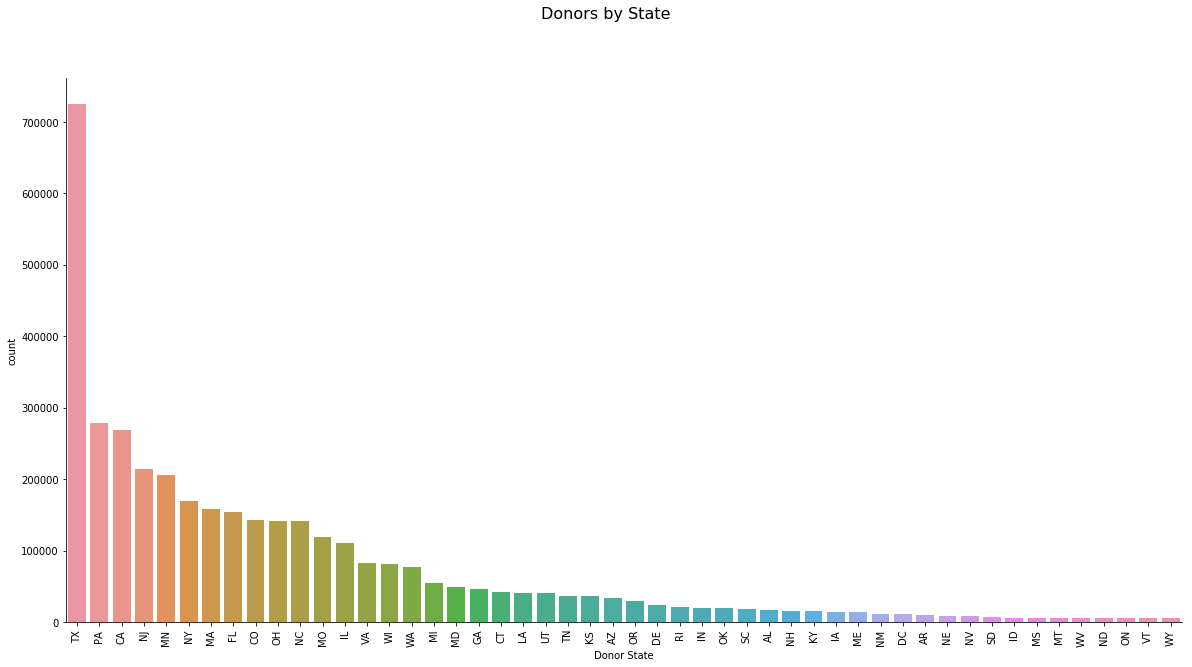

In [107]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Donor State', data=combined,order = combined['Donor State'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.suptitle('Donors by State', fontsize=16)

sns.despine()
#plt.tight_layout()

Text(0.5,0.98,'Gift Amount by State and Donor Connection to MS')

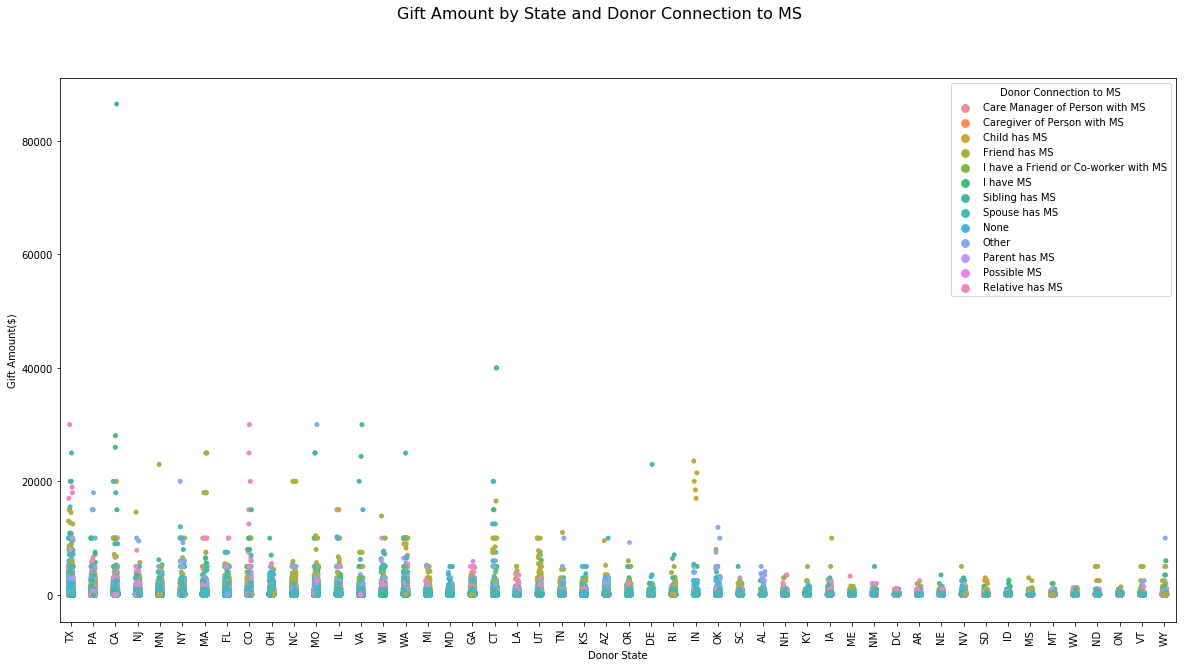

In [108]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Donor State', y="Gift Amount($)", hue="Donor Connection to MS",data=combined, order = combined['Donor State'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Gift Amount by State and Donor Connection to MS', fontsize=16)



Text(0.5,0.98,'Gift Amount by Donor Connection to MS and Past Participation')

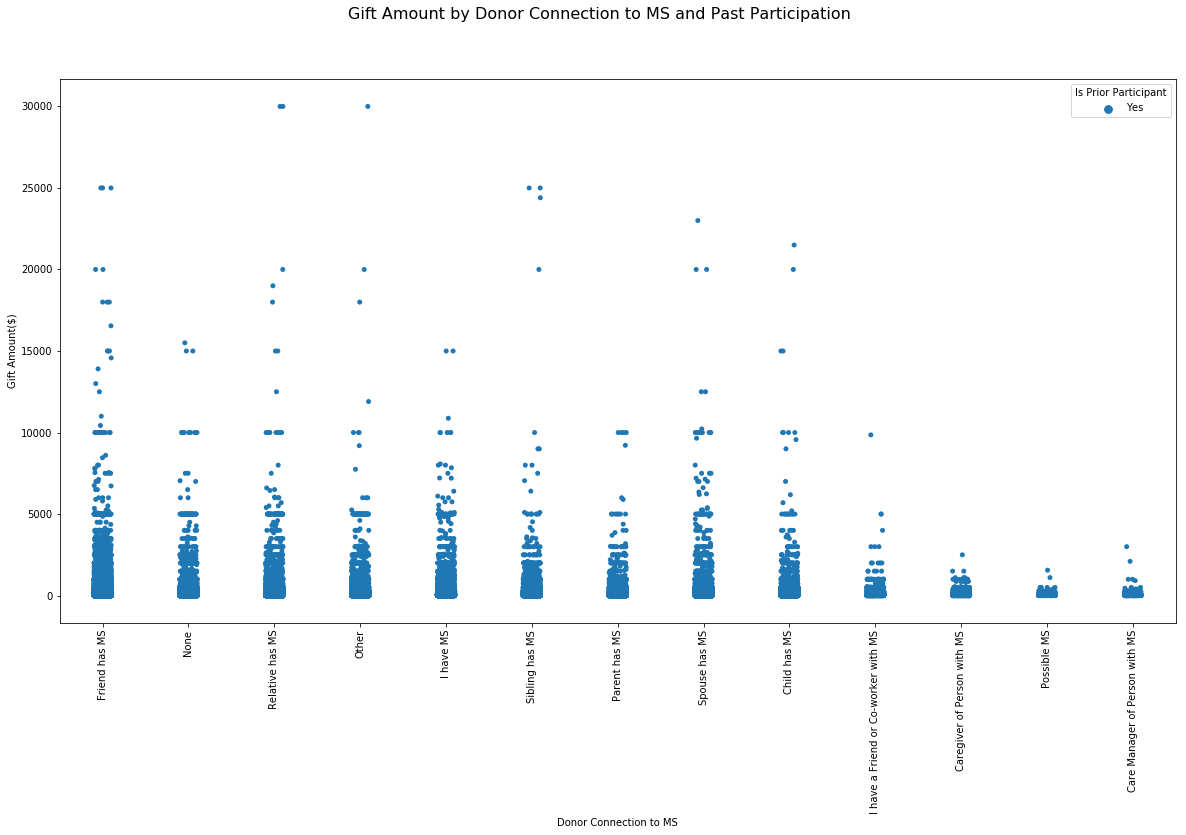

In [109]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Donor Connection to MS', y="Gift Amount($)", hue="Is Prior Participant",data=combined, order = combined['Donor Connection to MS'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Gift Amount by Donor Connection to MS and Past Participation', fontsize=16)



Text(0.5,0.98,'Gift Amount by Year and Donor Connection to MS')

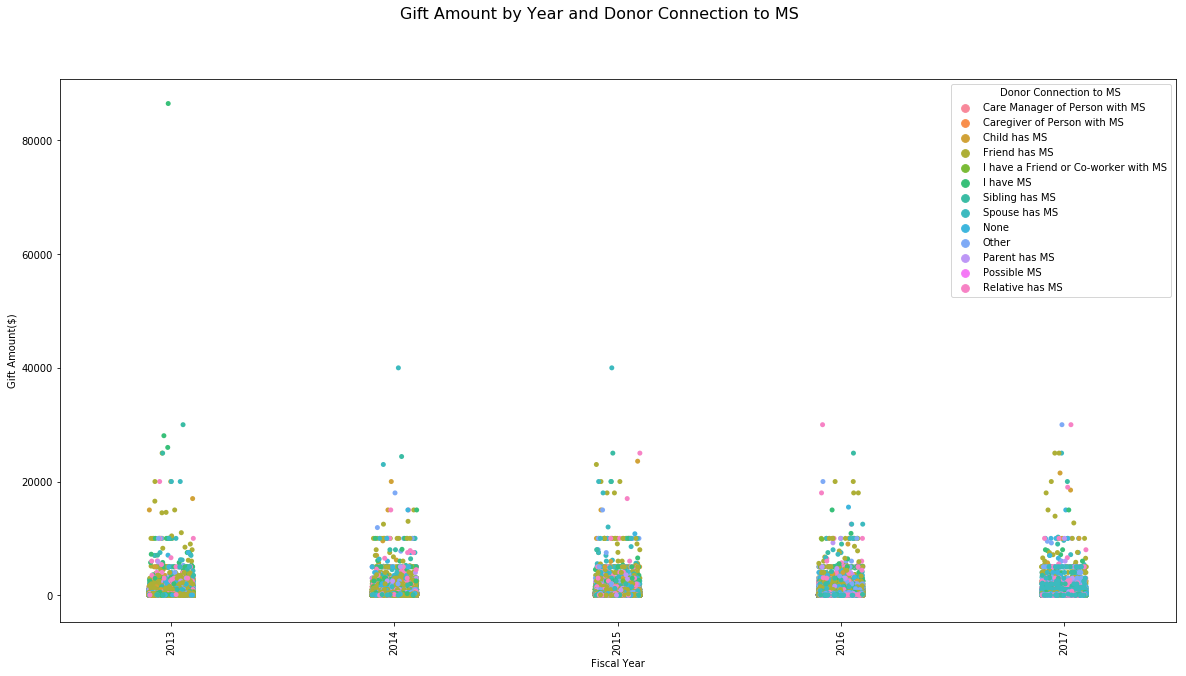

In [110]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Fiscal Year', y="Gift Amount($)", hue="Donor Connection to MS",data=combined, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Gift Amount by Year and Donor Connection to MS', fontsize=16)



Text(0.5,0.98,'Gift Amount by Top 50 Employers and Fiscal Year')

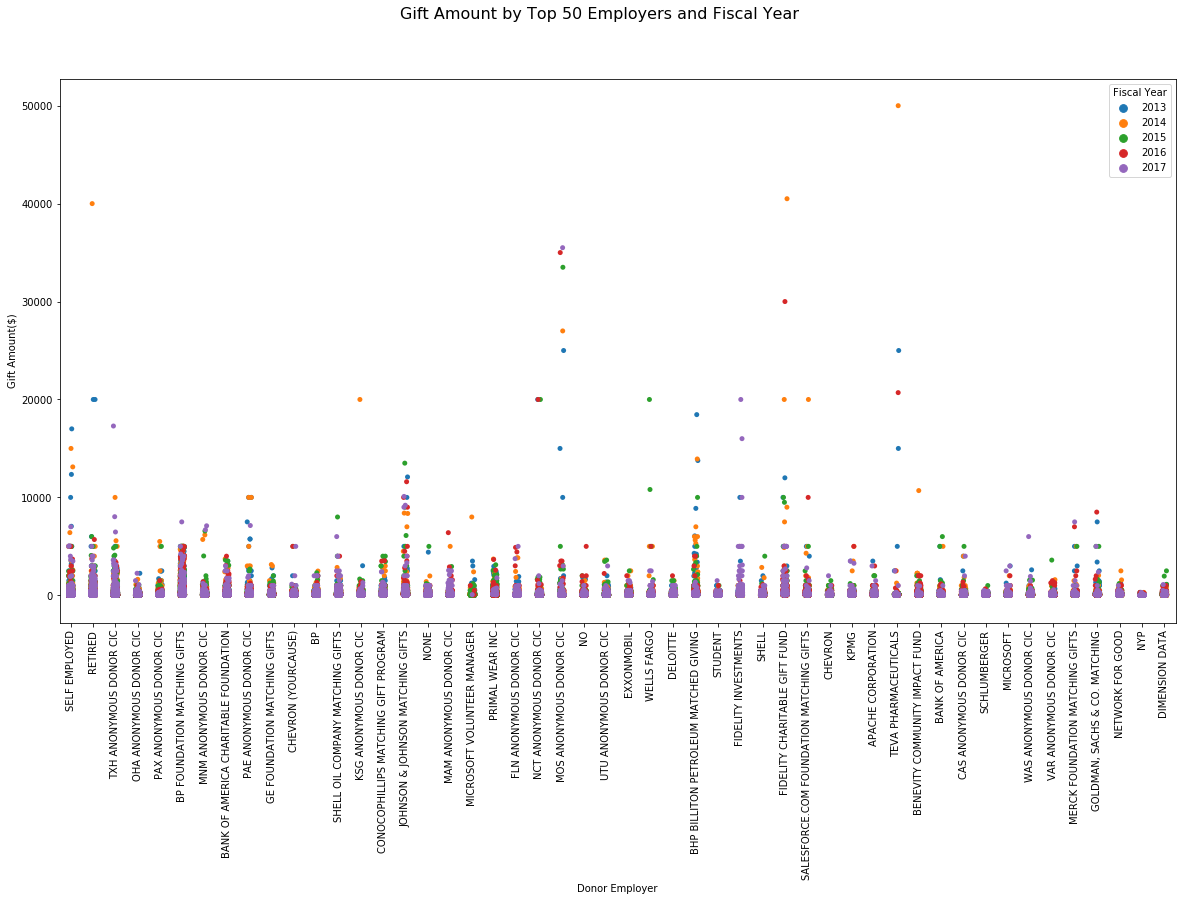

In [111]:
plt.figure(figsize=(20,10))

sns.stripplot(x='Donor Employer', y="Gift Amount($)", hue="Fiscal Year",data=combined, order = combined['Donor Employer'].value_counts().iloc[:50].index, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Gift Amount by Top 50 Employers and Fiscal Year', fontsize=16)



# Describing Data

In [112]:
dummy = pd.get_dummies(combined['Donor Gender'])
combinedd = pd.concat([combined, dummy],axis=1)
combinedd.head()

,Security Category Name,Event ID,Public Event Name,Fiscal Year,Event Date,Campaign Title,Campaign ID,Gift Amount($),Date Recorded,Gift Type,...,Ledger Transaction Amount,Proxy Type,User Confirmation Code,Source Code Type,Source Code Text,Sub Source Code Text,Batch ID,Female,Male,U
0,ARR Bike Events,21467,Bike MS: Rock'n Hot Ride 2013,2013,2013-09-07 13:34:00,"Arkansas, Little Rock - bike MS: Arkansas 2013",37233,50.0,2013-09-19 08:02:00,online,...,50,TeamRaiser Participant,1638-37233-1-12589190-13049839,6,mail.yahoo.com,NaN,NaN,0,1,0
1,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,35.0,2013-09-09 18:55:00,online,...,35,TeamRaiser Participant,1638-36094-1-12523987-12980208,NaN,NaN,NaN,NaN,0,0,0
2,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,50.0,2013-09-12 18:43:00,online,...,50,TeamRaiser Participant,1638-36094-1-12547614-13005364,NaN,NaN,NaN,NaN,1,0,0
3,CAS Bike Events,18684,Bike MS Bay to Bay Tour 2012,2013,2012-10-20 15:18:00,CAS 2012 Bike MS,33413,35.0,2012-10-18 16:39:00,online,...,35,TeamRaiser Participant,1638-33413-1-10960670-11312399,Web Link,boundlessfundraising,bfgetwordout,NaN,1,0,0
4,COC Bike Events,20901,Newmont Bike MS 2013 presented by Point B,2013,2013-06-29 12:00:00,COC 2013 Bike MS - Colorado,35538,25.0,2013-06-28 16:33:00,online,...,25,TeamRaiser Participant,1638-35538-1-12205268-12638715,6,www.facebook.com,/l.php,NaN,1,0,0


In [113]:
dummy = pd.get_dummies(combined['Gift Type'])
combinedd = pd.concat([combinedd, dummy],axis=1)
combinedd.head()

,Security Category Name,Event ID,Public Event Name,Fiscal Year,Event Date,Campaign Title,Campaign ID,Gift Amount($),Date Recorded,Gift Type,...,User Confirmation Code,Source Code Type,Source Code Text,Sub Source Code Text,Batch ID,Female,Male,U,offline,online
0,ARR Bike Events,21467,Bike MS: Rock'n Hot Ride 2013,2013,2013-09-07 13:34:00,"Arkansas, Little Rock - bike MS: Arkansas 2013",37233,50.0,2013-09-19 08:02:00,online,...,1638-37233-1-12589190-13049839,6,mail.yahoo.com,NaN,NaN,0,1,0,0,1
1,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,35.0,2013-09-09 18:55:00,online,...,1638-36094-1-12523987-12980208,NaN,NaN,NaN,NaN,0,0,0,0,1
2,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,50.0,2013-09-12 18:43:00,online,...,1638-36094-1-12547614-13005364,NaN,NaN,NaN,NaN,1,0,0,0,1
3,CAS Bike Events,18684,Bike MS Bay to Bay Tour 2012,2013,2012-10-20 15:18:00,CAS 2012 Bike MS,33413,35.0,2012-10-18 16:39:00,online,...,1638-33413-1-10960670-11312399,Web Link,boundlessfundraising,bfgetwordout,NaN,1,0,0,0,1
4,COC Bike Events,20901,Newmont Bike MS 2013 presented by Point B,2013,2013-06-29 12:00:00,COC 2013 Bike MS - Colorado,35538,25.0,2013-06-28 16:33:00,online,...,1638-35538-1-12205268-12638715,6,www.facebook.com,/l.php,NaN,1,0,0,0,1


In [114]:
dummy = pd.get_dummies(combined['Donor State'])
combinedd = pd.concat([combinedd, dummy],axis=1)
combinedd.head()

,Security Category Name,Event ID,Public Event Name,Fiscal Year,Event Date,Campaign Title,Campaign ID,Gift Amount($),Date Recorded,Gift Type,...,VA,VI,VT,WA,WI,WV,WY,Waverly,YT,antioquia
0,ARR Bike Events,21467,Bike MS: Rock'n Hot Ride 2013,2013,2013-09-07 13:34:00,"Arkansas, Little Rock - bike MS: Arkansas 2013",37233,50.0,2013-09-19 08:02:00,online,...,0,0,0,0,0,0,0,0,0,0
1,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,35.0,2013-09-09 18:55:00,online,...,0,0,0,0,0,0,0,0,0,0
2,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,50.0,2013-09-12 18:43:00,online,...,0,0,0,0,0,0,0,0,0,0
3,CAS Bike Events,18684,Bike MS Bay to Bay Tour 2012,2013,2012-10-20 15:18:00,CAS 2012 Bike MS,33413,35.0,2012-10-18 16:39:00,online,...,0,0,0,0,0,0,0,0,0,0
4,COC Bike Events,20901,Newmont Bike MS 2013 presented by Point B,2013,2013-06-29 12:00:00,COC 2013 Bike MS - Colorado,35538,25.0,2013-06-28 16:33:00,online,...,0,0,0,0,0,0,0,0,0,0


In [115]:
dummy = pd.get_dummies(combined['Donor Connection to MS'])
combinedd = pd.concat([combinedd, dummy],axis=1)
combinedd.head()

,Security Category Name,Event ID,Public Event Name,Fiscal Year,Event Date,Campaign Title,Campaign ID,Gift Amount($),Date Recorded,Gift Type,...,Friend has MS,I have MS,I have a Friend or Co-worker with MS,None,Other,Parent has MS,Possible MS,Relative has MS,Sibling has MS,Spouse has MS
0,ARR Bike Events,21467,Bike MS: Rock'n Hot Ride 2013,2013,2013-09-07 13:34:00,"Arkansas, Little Rock - bike MS: Arkansas 2013",37233,50.0,2013-09-19 08:02:00,online,...,0,0,0,0,0,0,0,0,0,0
1,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,35.0,2013-09-09 18:55:00,online,...,0,0,0,0,0,0,0,0,0,0
2,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,50.0,2013-09-12 18:43:00,online,...,0,0,0,0,0,0,0,0,0,0
3,CAS Bike Events,18684,Bike MS Bay to Bay Tour 2012,2013,2012-10-20 15:18:00,CAS 2012 Bike MS,33413,35.0,2012-10-18 16:39:00,online,...,0,0,0,0,0,0,0,0,0,0
4,COC Bike Events,20901,Newmont Bike MS 2013 presented by Point B,2013,2013-06-29 12:00:00,COC 2013 Bike MS - Colorado,35538,25.0,2013-06-28 16:33:00,online,...,0,0,0,0,0,0,0,0,0,0


In [116]:



dummy = pd.get_dummies(combined['Is Prior Participant'])
combinedd = pd.concat([combinedd, dummy],axis=1)
combinedd.head()

,Security Category Name,Event ID,Public Event Name,Fiscal Year,Event Date,Campaign Title,Campaign ID,Gift Amount($),Date Recorded,Gift Type,...,I have MS,I have a Friend or Co-worker with MS,None,Other,Parent has MS,Possible MS,Relative has MS,Sibling has MS,Spouse has MS,Yes
0,ARR Bike Events,21467,Bike MS: Rock'n Hot Ride 2013,2013,2013-09-07 13:34:00,"Arkansas, Little Rock - bike MS: Arkansas 2013",37233,50.0,2013-09-19 08:02:00,online,...,0,0,0,0,0,0,0,0,0,1
1,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,35.0,2013-09-09 18:55:00,online,...,0,0,0,0,0,0,0,0,0,1
2,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,50.0,2013-09-12 18:43:00,online,...,0,0,0,0,0,0,0,0,0,1
3,CAS Bike Events,18684,Bike MS Bay to Bay Tour 2012,2013,2012-10-20 15:18:00,CAS 2012 Bike MS,33413,35.0,2012-10-18 16:39:00,online,...,0,0,0,0,0,0,0,0,0,0
4,COC Bike Events,20901,Newmont Bike MS 2013 presented by Point B,2013,2013-06-29 12:00:00,COC 2013 Bike MS - Colorado,35538,25.0,2013-06-28 16:33:00,online,...,0,0,0,0,0,0,0,0,0,1


In [117]:

dummy = pd.get_dummies(combined['Is Team Captain'])
combinedd = pd.concat([combinedd, dummy],axis=1)
combinedd.head()

,Security Category Name,Event ID,Public Event Name,Fiscal Year,Event Date,Campaign Title,Campaign ID,Gift Amount($),Date Recorded,Gift Type,...,None,Other,Parent has MS,Possible MS,Relative has MS,Sibling has MS,Spouse has MS,Yes,0.0,1.0
0,ARR Bike Events,21467,Bike MS: Rock'n Hot Ride 2013,2013,2013-09-07 13:34:00,"Arkansas, Little Rock - bike MS: Arkansas 2013",37233,50.0,2013-09-19 08:02:00,online,...,0,0,0,0,0,0,0,1,1,0
1,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,35.0,2013-09-09 18:55:00,online,...,0,0,0,0,0,0,0,1,0,1
2,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,50.0,2013-09-12 18:43:00,online,...,0,0,0,0,0,0,0,1,1,0
3,CAS Bike Events,18684,Bike MS Bay to Bay Tour 2012,2013,2012-10-20 15:18:00,CAS 2012 Bike MS,33413,35.0,2012-10-18 16:39:00,online,...,0,0,0,0,0,0,0,0,1,0
4,COC Bike Events,20901,Newmont Bike MS 2013 presented by Point B,2013,2013-06-29 12:00:00,COC 2013 Bike MS - Colorado,35538,25.0,2013-06-28 16:33:00,online,...,0,0,0,0,0,0,0,1,1,0


In [118]:
dummy = pd.get_dummies(combined['Gift Payment Method'])
combinedd = pd.concat([combinedd, dummy],axis=1)
combinedd.head()

,Security Category Name,Event ID,Public Event Name,Fiscal Year,Event Date,Campaign Title,Campaign ID,Gift Amount($),Date Recorded,Gift Type,...,Possible MS,Relative has MS,Sibling has MS,Spouse has MS,Yes,0.0,1.0,Cash,Check,Credit Card
0,ARR Bike Events,21467,Bike MS: Rock'n Hot Ride 2013,2013,2013-09-07 13:34:00,"Arkansas, Little Rock - bike MS: Arkansas 2013",37233,50.0,2013-09-19 08:02:00,online,...,0,0,0,0,1,1,0,0,0,1
1,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,35.0,2013-09-09 18:55:00,online,...,0,0,0,0,1,0,1,0,0,1
2,CAN Bike Events,20747,"California, Bike MS: Waves to Wine Ride 2013",2013,2013-09-21 10:53:00,Bike MS: Waves to Wine Ride 2013,36094,50.0,2013-09-12 18:43:00,online,...,0,0,0,0,1,1,0,0,0,1
3,CAS Bike Events,18684,Bike MS Bay to Bay Tour 2012,2013,2012-10-20 15:18:00,CAS 2012 Bike MS,33413,35.0,2012-10-18 16:39:00,online,...,0,0,0,0,0,1,0,0,0,1
4,COC Bike Events,20901,Newmont Bike MS 2013 presented by Point B,2013,2013-06-29 12:00:00,COC 2013 Bike MS - Colorado,35538,25.0,2013-06-28 16:33:00,online,...,0,0,0,0,1,1,0,0,0,1


In [119]:
combinedd.describe()

,Event ID,Fiscal Year,Campaign ID,Gift Amount($),Donor ConsID,Participant Contact ID,Participant Goal($),Is Team Captain,Female,Male,...,Possible MS,Relative has MS,Sibling has MS,Spouse has MS,Yes,0.0,1.0,Cash,Check,Credit Card
count,3.807372e+06,3.807372e+06,3.807372e+06,3.807372e+06,3.807372e+06,3.765003e+06,3.807372e+06,3.763547e+06,3.807372e+06,3.807372e+06,...,3.807372e+06,3.807372e+06,3.807372e+06,3.807372e+06,3.807372e+06,3.807372e+06,3.807372e+06,3.807372e+06,3.807372e+06,3.807372e+06
mean,2.427427e+04,2.014830e+03,3.864334e+04,9.176821e+01,1.114265e+07,9.583535e+06,5.906396e+03,1.318007e-01,4.336774e-01,4.392447e-01,...,2.300800e-04,8.155862e-02,1.577335e-02,9.368404e-03,4.871111e-01,8.582059e-01,1.302836e-01,2.098639e-02,1.729495e-01,8.060641e-01
std,3.047823e+03,1.398312e+00,3.807033e+03,3.818845e+02,3.890505e+06,4.513583e+06,1.056487e+06,3.382740e-01,4.955819e-01,4.962951e-01,...,1.516664e-02,2.736911e-01,1.245976e-01,9.633608e-02,4.998339e-01,3.488389e-01,3.366152e-01,1.433386e-01,3.782036e-01,3.953793e-01
min,1.796600e+04,2.013000e+03,4.328000e+03,0.000000e+00,1.361581e+06,1.566043e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.150700e+04,2.014000e+03,3.555500e+04,2.500000e+01,8.629686e+06,5.874081e+06,4.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.491600e+04,2.015000e+03,3.653300e+04,5.000000e+01,1.233783e+07,1.051616e+07,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.704800e+04,2.016000e+03,4.147400e+04,1.000000e+02,1.420022e+07,1.348215e+07,2.000000e+03,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2.917500e+04,2.017000e+03,4.514700e+04,1.491750e+05,1.636616e+07,1.636564e+07,5.000000e+08,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [120]:
combinedd.corr()

,Event ID,Fiscal Year,Campaign ID,Gift Amount($),Donor ConsID,Participant Contact ID,Participant Goal($),Is Team Captain,Female,Male,...,Possible MS,Relative has MS,Sibling has MS,Spouse has MS,Yes,0.0,1.0,Cash,Check,Credit Card
Event ID,1.000000,0.970944,0.723636,0.012107,0.245733,0.166895,1.140236e-03,0.016021,-0.017410,-0.021614,...,0.008260,0.007755,0.005556,0.006000,-0.035224,-0.014854,0.016004,-0.027964,-0.027377,0.036325
Fiscal Year,0.970944,1.000000,0.711374,0.012362,0.253803,0.175872,5.419021e-04,0.016907,-0.018833,-0.018563,...,0.009028,0.006837,0.004739,0.005412,-0.001403,-0.014855,0.017017,-0.032844,-0.038619,0.048848
Campaign ID,0.723636,0.711374,1.000000,0.014447,0.192681,0.154654,2.157769e-03,-0.025771,-0.021906,-0.005180,...,0.005352,-0.015232,-0.005240,-0.000778,-0.022242,0.027730,-0.025137,-0.036167,-0.031811,0.043541
Gift Amount($),0.012107,0.012362,0.014447,1.000000,-0.025367,-0.030656,7.042494e-04,0.033279,-0.053101,0.006606,...,-0.000637,-0.007799,0.004775,0.014930,0.020583,-0.038310,0.026637,-0.009194,0.070194,-0.063812
Donor ConsID,0.245733,0.253803,0.192681,-0.025367,1.000000,0.366342,7.146748e-04,-0.053313,-0.027260,-0.056928,...,0.004302,-0.033462,-0.037736,-0.044212,-0.138040,0.048873,-0.053326,-0.009020,-0.043483,0.044864
Participant Contact ID,0.166895,0.175872,0.154654,-0.030656,0.366342,1.000000,1.532302e-03,-0.148593,-0.000052,-0.016226,...,0.003036,-0.000730,-0.008278,-0.006125,-0.281819,0.147578,-0.148673,-0.003297,-0.126106,0.121814
Participant Goal($),0.001140,0.000542,0.002158,0.000704,0.000715,0.001532,1.000000e+00,-0.000136,0.000011,0.000005,...,-0.000056,0.000216,-0.000325,-0.000339,-0.002353,0.000291,-0.000110,-0.000652,-0.000294,0.000517
Is Team Captain,0.016021,0.016907,-0.025771,0.033279,-0.053313,-0.148593,-1.357914e-04,1.000000,0.005226,-0.008078,...,-0.001320,0.008138,0.010570,0.011213,0.119045,-1.000000,1.000000,-0.004962,0.047138,-0.043294
Female,-0.017410,-0.018833,-0.021906,-0.053101,-0.027260,-0.000052,1.100653e-05,0.005226,1.000000,-0.774494,...,0.000423,0.032593,0.018824,-0.031192,-0.017256,-0.003301,0.005461,-0.058992,-0.063412,0.082044
Male,-0.021614,-0.018563,-0.005180,0.006606,-0.056928,-0.016226,4.639277e-06,-0.008078,-0.774494,1.000000,...,0.000880,0.008450,0.003101,0.051345,0.014054,0.012533,-0.007273,-0.045376,-0.156819,0.166457


In [121]:
# counting 1 values

print((combined[['Security Category Name','Event ID','Public Event Name','Fiscal Year','Event Date','Campaign Title','Campaign ID','Gift Amount($)','Date Recorded','Gift Type','Gift Payment Method','Offline Status','Soft Credit Type','Is Registration?','Donor ConsID','Donor Member ID','Donor Affiliate Code','Donor Gender','Donor Accept Email','Donor Opt-out Date','Donor Opt-out Method','Donor Email Status','Donor City','Donor State','Donor County','Donor ZIP','Donor Employer','Donor Connection to MS','Participant Contact ID','Participant Member ID','Participation Type Name','Registration Active Status','Registration Date','Participant Goal($)','Is Prior Participant','Is Team Captain','Additional Gift Amount($)','Team Name','Team','Team Creation Date','Original Value Transacted','Net Transaction Amount','Ledger Transaction Amount','Proxy Type','User Confirmation Code','Source Code Type','Source Code Text','Sub Source Code Text','Batch ID']] == 1).sum())


Security Category Name              0
Event ID                            0
Public Event Name                   0
Fiscal Year                         0
Event Date                          0
Campaign Title                      0
Campaign ID                         0
Gift Amount($)                    535
Date Recorded                       0
Gift Type                           0
Gift Payment Method                 0
Offline Status                      0
Soft Credit Type                    0
Is Registration?               377791
Donor ConsID                        0
Donor Member ID                     0
Donor Affiliate Code                0
Donor Gender                        0
Donor Accept Email            1894543
Donor Opt-out Date                  0
Donor Opt-out Method                0
Donor Email Status                  0
Donor City                          3
Donor State                         0
Donor County                        0
Donor ZIP                          46
Donor Employ

# FIRST PRIORITY: CORPORATE ACQUISITION
  * What are the greatest growth opportunities for new corporate teams?
  * Can we apply those opportunities to specific rides/markets, especially our biggest events?
  * What industries have had the strongest involvement in Bike MS in the last five years?
  * What occupations were responsible for most of our fundraising?
  * Can we tie together these industries and occupations to identify gaps/opportunities?
  * What is the common denominator for our top performing corporate teams? (Is it industry, culture, executive involvement, connection to MS, other?)
  * Can we quantify the effect competing events are having in our top markets? 
Top competitors:
   1. Best Buddies
     * HYANNIS PORT June 2, 2018 Boston to Hyannis Port, MA
     * HEARST CASTLE September 8, 2018 San Simeon, CA
     * MIAMI November 16, 2018 Miami, FL
   2. Peddle the Cause
     * Louis
     * San Diego
   3. Pelatonia – OH
   4. PanMass Challenge - Boston
   5. ADA – Tour de Cure
   6. Jude Children’s Research Hospital
   7. JDRF Ride to Cure Diabetes
   8. Cycle for Life - Cystic Fibrosis Foundation
   9. Ride to Recovery
   10. Virtual Cycling
   11. Athletic Club Stationary Cycling Relays
   12. American Cancer Society
   13. Leukemia and Lymphoma Society – Team in Training

# SECOND PRIORITY: DIGITAL/SOCIAL ACQUISITION
  * What are the greatest opportunities for digital marketing investments? Where have we seen the greatest ROI?
  * Once someone is registered, what tactics and behaviors drive fundraising, and at what times leading up to the event?
  * What behavioral data do you see about usage of our fundraising tools and how it may or may not relate to performance of top fundraisers?
  * Despite increasing our digital advertising spend, acquisition continues to trend downward overall. Why? Is it an issue of needing more traffic, better targeting, or a conversion rate issue that needs to be addressed through the registration process? What can we do to reverse the trend?


# FINALLY:
  * As you studied this data, is there something else that came up as an insight into our operations that the questions above do not capture? 


# Descriptive Analytics